## **Imports**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv


In [2]:
import gc
import time

%matplotlib inline

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## EDA : Application data

In [3]:
app_train = pd.read_csv('../input/home-credit-default-risk/application_train.csv')
app_test = pd.read_csv('../input/home-credit-default-risk/application_test.csv')

In [4]:
# training 데이터 피쳐 살펴보기
print('Training data shape: ', app_train.shape)
app_train.head()

# Training data 는 307511개의 데이터가 있고 TARGET을 포함한 122개의 피쳐를 갖고 있다.

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# testing 데이터 피쳐 살펴보기
print('Testing data shape: ', app_test.shape)
app_test.head()

# Testing data는 48744 개의 데이터와 TARGET 이 빠진 121개의 피쳐를 갖고 있다.

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [6]:
# 'TARGET' 컬럼 살펴보기
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

'\n0은 대출을 제때 상환할 수 있다는 뜻이고 1은 대출상환에 어려움을 갖고 있다는 것을 의미한다. \n'

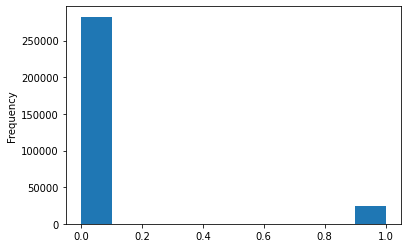

In [7]:
# TARGET 컬럼 데이터 개수 히스토그램 시각화
app_train['TARGET'].plot.hist();

'''
0은 대출을 제때 상환할 수 있다는 뜻이고 1은 대출상환에 어려움을 갖고 있다는 것을 의미한다. 
'''

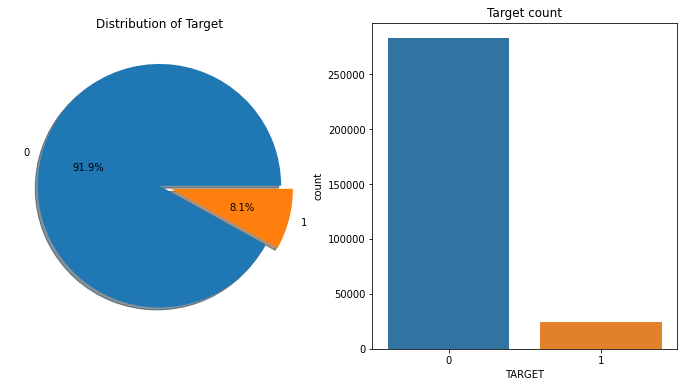

In [8]:
# target 개수 시각화 2
f,ax=plt.subplots(1,2,figsize=(12,6))
app_train.TARGET.value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Target')
ax[0].set_ylabel('')
sns.countplot('TARGET',data=app_train,ax=ax[1])
ax[1].set_title('Target count')
plt.show()

# 0이 1보다 훨씬 더 많았고 1은 데이터의 8%만을 차지한다. 비율이 반반이 아니므로 모델링 할 때 가중치 조절이 필요하다. 

In [9]:
# training 데이터 칼럼 확인
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [10]:
# column type 수 확인
app_train.dtypes.value_counts()

# int64 와 float64 는 수치형 변수이고 object는 string을 포함한 범주형 변수이다. 나중에 encoding 할 필요가 있어보인다. 

float64    65
int64      41
object     16
dtype: int64

In [11]:
# target 변수와 다른 변수들간의 상관관계를 살펴보았다. 그리고 sorting 하였다. 
correlations = app_train.corr()['TARGET'].sort_values()

# 양의 상관관계 높은 것 15개, 음의 상관관계 높은 것 15개 나타내기
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

'''
'DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY'가 양의 상관관계를 보이는 것들 중에 가장 높았다.
'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1'가 음의 상관관계를 보이는 것들 중에 가장 높았다. 
이 변수들을 중점으로 EDA를 할 것이다. 
'''

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


"\n'DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY'가 양의 상관관계를 보이는 것들 중에 가장 높았다.\n'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1'가 음의 상관관계를 보이는 것들 중에 가장 높았다. \n이 변수들을 중점으로 EDA를 할 것이다. \n"

### EDA1 : 'DAYS_BIRTH'

'DAYS BIRTH' 는 고객의 고객 나이를 신청 일자 기준으로 변환한 값이다. 따라서 음수값이고, 일(days) 단위이다. 

In [12]:
# DAYS_BIRTH 데이터 살펴보기
app_train['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [13]:
# 'DAYS_BIRTH' 가 음수이고 년 단위로 보기 위해서 -365로 나눈다. 
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

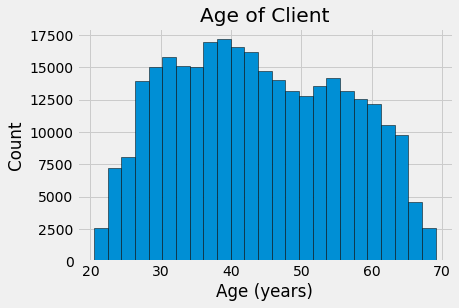

In [14]:
plt.style.use('fivethirtyeight')

# 고객 나이에 대한 히스토그램 분포를 확인한다. 
plt.hist(app_train['DAYS_BIRTH']/-365, edgecolor='k',bins=25)
plt.title('Age of Client');
plt.xlabel('Age (years)');
plt.ylabel('Count');

# 이상값 없이 나이가 고르게 분포되어 있다. 

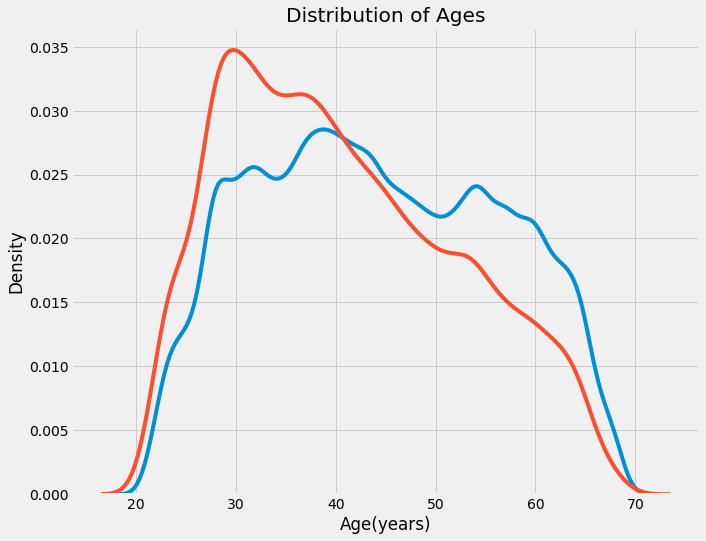

In [15]:
plt.figure(figsize=(10,8))

# 제때 대출을 상환하는 고객의 나이 plot (TARGET=0)
sns.kdeplot(app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH']/-365,label='target==0')

# 제때 대출을 상환하지못하는 고객의 나이 plot (TARGET=1)
sns.kdeplot(app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH']/-365,label='target==1')

plt.xlabel('Age(years)');
plt.ylabel('Density');
plt.title('Distribution of Ages');

# target==1(빨간색) 의 분포를 보면 20-30대에 기울어 있는것을 볼 수 있다. 이는 젊은 층일수록 대출 상환을 못할 확률이 높다고 유추할 수 있다.
# target==0일때와 1일때의 TARGET과의 분포가 상이한것으로 보아 이 변수는 머신러닝 모델에 유용하게 활용될 것으로 보인다.


In [16]:
# 나이를 나이대 별로 그룹을 나눠서 target=1(대출 상환이 어려운) 의 평균값을 살펴본다.
# 최소 20 최대 70으로해서 총 10개로 그룹핑하였다. 
# 결과는 '~'이상 '~'미만으로 그룹핑된다.
np.linspace(20,70,num=11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [17]:
# cut() 함수를 사용해서 5살 간격으로 나이대 그룹을 나눠보았고, 각 나이대 별로 대출상환을 못하는 비율을 체크하였다.

age_data=app_train[['TARGET','DAYS_BIRTH']]
age_data['DAYS_BIRTH']=-age_data['DAYS_BIRTH']
age_data['YEARS_BIRTH']=age_data['DAYS_BIRTH']/365
age_data['YEARS_BINNED']=pd.cut(age_data['YEARS_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [18]:
# bin으로 groupby 하고 평균 계산하기
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


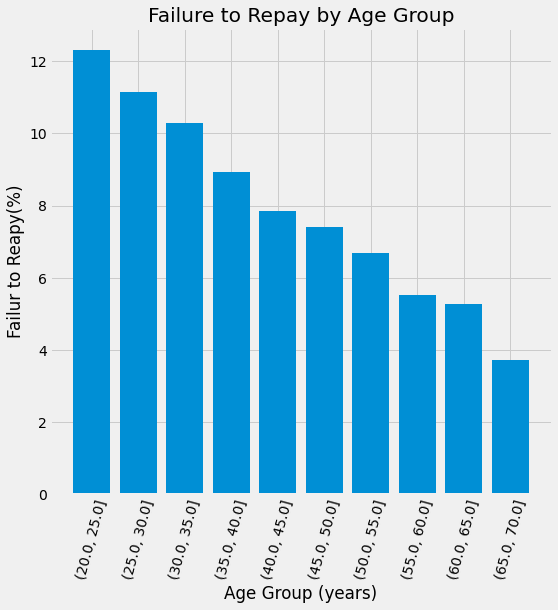

In [19]:
plt.figure(figsize=(8,8))

# 나이와 target 평균을 bar plot으로 시각화 하였다. 
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation=75);
plt.xlabel('Age Group (years)');
plt.ylabel('Failur to Reapy(%)')
plt.title('Failure to Repay by Age Group');

# 젊은층일수록 대출을 상환하지 못하는 것으로 나타났다. 
# 20-25세, 25-30세 30-35세는 각각 약10% 이상 대출을 상환하지 못했고, 55-60세, 60-65세, 65-70세는 5%이하로 대출을 상환하지 못했다.

### EDA2 : 'DAYS_EMPLOYED'

'DAYS_EMPLOYED'는 고객 소득과 관련된 데이터로, 대출 신청전 현 직업 유지기간을 의미한다. 마찬가지로 음수 값을 띄며 일(days) 단위 이다.

In [20]:
# 데이터 살펴보기 
app_train['DAYS_EMPLOYED'].head()

0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64

In [21]:
# 통계량 확인하기
app_train['DAYS_EMPLOYED'].describe()
# 최댓값이 365243 이고, std 값이 매우 큰 것으로 보아 이상점이 있을 것이라 판단된다. 

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

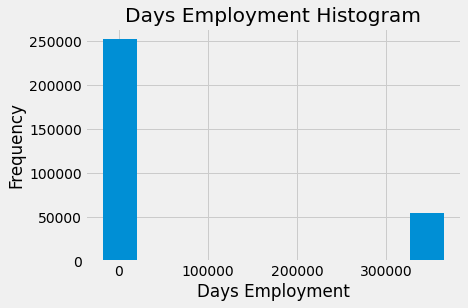

In [22]:
# 365243 이라는 최대값을 갖고 있다. 이상값이라고 판단하기에는 시각화로 보았을 때 무시할 수 없을 정도로 그 수가 상당히 많다.
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [23]:
# 365243 을 이상값으로 보고, 365243인 값과 아닌 값으로 나누어 target 비율을 살펴보았다.

anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('이상값이 아닌 data의 target 평균: %0.2f%%' % (100 * non_anom['TARGET'].mean()))
print('이상값인 data의 target 평균: %0.2f%%' % (100 * anom['TARGET'].mean()))

'''
365243을 갖는 데이터와 아닌 데이터로 나누어서 타겟값의 평균의 100을 곱해서 부채 비율을 보았다. 
이상값으로 보이는 고객들이 대출을 상환하지못할 확률이 5.4%로 더 낮다. 
'''

이상값이 아닌 data의 target 평균: 8.66%
이상값인 data의 target 평균: 5.40%


'\n365243을 갖는 데이터와 아닌 데이터로 나누어서 타겟값의 평균의 100을 곱해서 부채 비율을 보았다. \n이상값으로 보이는 고객들이 대출을 상환하지못할 확률이 5.4%로 더 낮다. \n'

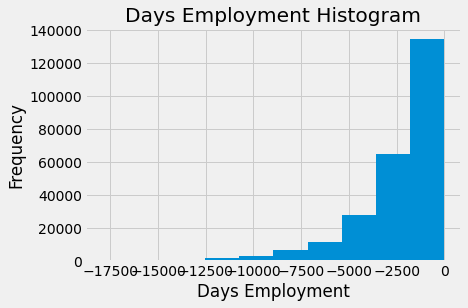

In [24]:
'''
이상값은 결측치로 채울 것이다.
이 경우 모든 이상값들이 같은값(365243)을 갖고 있으므로, 다 같은 값으로 채워야 한다. 그리고 나중에 머신러닝 모델에 이 이상값들을 
임의로 채운것에 대해 알려줄 것이다. 이상값을 숫자로 채우지 않고, 새로운 boolean 컬럼을 만들어서 이상값인지 아닌지를 구분할것이다.
'''
# 이상값(365243)인 값에 대해서 True , False로 구분
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# 이상값을 nan값으로 대치
app_train['DAYS_EMPLOYED'].replace({365243:np.nan},inplace=True)

# 히스토그램으로 확인하기
app_train['DAYS_EMPLOYED'].plot.hist(title='Days Employment Histogram');
plt.xlabel('Days Employment');

# 365243의 값이 nan값으로 대치되었다.

In [25]:
# test 데이터에도 train 데이터와 동일하게 작업한다.
app_test['DAYS_EMPLOYED_ANOM']=app_test['DAYS_EMPLOYED']==365243
app_test['DAYS_EMPLOYED'].replace({365243:np.nan}, inplace=True)

# True, False로 되어있는 데이터 sum하면 True인것 개수를 카운팅한다.
print('%d 개의 data 중에 testing data에서 %d 개의 이상값이 있다.'%(len(app_test),app_test['DAYS_EMPLOYED_ANOM'].sum()))

48744 개의 data 중에 testing data에서 9274 개의 이상값이 있다.


### EDA3 : 'REGION_RATING_CLIENT_W_CITY'

'REGION_RATING_CLIENT_W_CITY'는 고객의 거주지를 나타내는 변수로, (1,2,3) 으로 거주 지역을 평가하여 나눈 변수이다. 

In [26]:
# 데이터 살펴보기
app_train['REGION_RATING_CLIENT_W_CITY'].head(10)

0    2
1    1
2    2
3    2
4    2
5    2
6    2
7    3
8    2
9    2
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

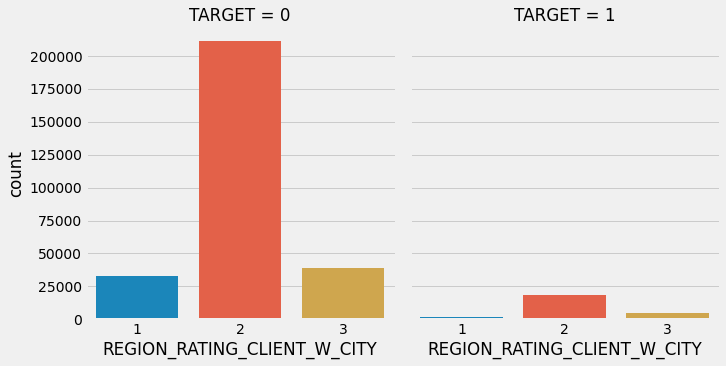

In [27]:
# catplot 으로 target 변수에 따른 데이터 분포 살펴보기
sns.catplot(x='REGION_RATING_CLIENT_W_CITY', col ='TARGET', data=app_train, kind='count')

# REGION_RATING_CLIENT_W_CITY가 2,3 의 경우 대출상환을 못하는 것으로 판단된다. 밑에서 더 자세히 살펴보겠다.

In [28]:
# REGION_RATING_CLIENT_W_CITY 에 대해 TARGET 1의 비율 보기
for a in range(3):
    print(len(app_train[(app_train['TARGET']==1)&(app_train['REGION_RATING_CLIENT_W_CITY']==a+1)])
      /len(app_train[app_train['REGION_RATING_CLIENT_W_CITY']==a+1])*100)

'''
REGION_RATING_CLIENT_W_CITY가 1인 고객의 대출상환을 못하는 경우는 4.8%, 2인 고객의 경우는 7.9%, 3인 고객의 경우는 11.4% 로 
REGION_RATING_CLIENT_W_CITY 평가가 3이 나온 경우에 대출상환이 어려울 것이라고 판단될 확률이 가장 높다.
이는 살고 있는 도시의 평가가 안좋을 수록 대출상환을 못할 확률도 높다는 뜻이다.
'''

4.840928381186525
7.917763329905353
11.40218878248974


'\nREGION_RATING_CLIENT_W_CITY가 1인 고객의 대출상환을 못하는 경우는 4.8%, 2인 고객의 경우는 7.9%, 3인 고객의 경우는 11.4% 로 \nREGION_RATING_CLIENT_W_CITY 평가가 3이 나온 경우에 대출상환이 어려울 것이라고 판단될 확률이 가장 높다.\n이는 살고 있는 도시의 평가가 안좋을 수록 대출상환을 못할 확률도 높다는 뜻이다.\n'

### EDA 4 : 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'

EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 는 외부 자원으로 부터 정규화된 스코어로 고객 행동을 나타낸다. 
음의 상관계수 중에 상관도가 가장 높았기에 이 세가지를 중점으로 EDA를 진행하였다.
TARGET 변수와 EXT_SOURCE와의 상관관계와 EXT_SOURCE 서로간의 상관관계를 살펴보았다.

In [29]:
# 'DAYS_BIRTH' 를 추가하여 상관 관계를 보았다. 'DAYS_BIRTH' 는 app_train 과 app_test 에서 동일하게 년 단위로 바꿔준다.
 
app_train['DAYS_BIRTH'] = app_train['DAYS_BIRTH'] / -365
app_test['DAYS_BIRTH'] = app_test['DAYS_BIRTH'] / -365

ext=app_train[['TARGET','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']]
extcorr = ext.corr()
extcorr

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


"\n'EXT_SOURCE'와 'TARGET'는 음의 상관관계에 있으므로, EXT_SOURCE값이 증가할수록 target값이 0이 많은 것으로, 대출 상환을 할 확률이 높다.\n'DAYS_BIRTH'는 'EXT_SOURCE_1'와 양의 상관관계에 있는 것으로 보아 이 score중 하나는 고객의 나이일것으로 추정된다.\n"

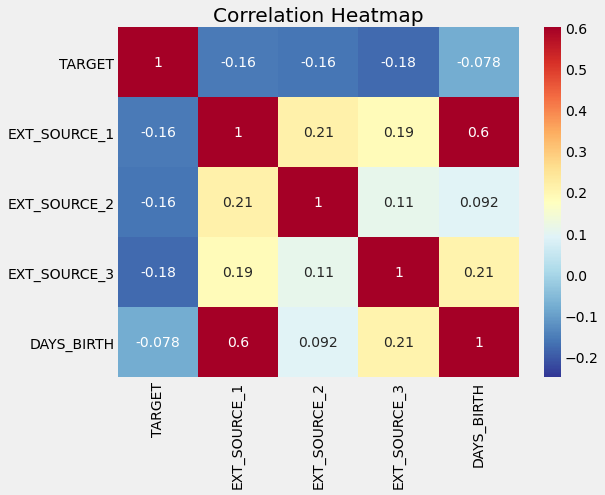

In [30]:
# 상관관계로 히트맵을 그려보았다.
plt.figure(figsize=(8,6))
sns.heatmap(extcorr, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap');

'''
'EXT_SOURCE'와 'TARGET'는 음의 상관관계에 있으므로, EXT_SOURCE값이 증가할수록 target값이 0이 많은 것으로, 대출 상환을 할 확률이 높다.
'DAYS_BIRTH'는 'EXT_SOURCE_1'와 양의 상관관계에 있는 것으로 보아 이 score중 하나는 고객의 나이일것으로 추정된다.
'''

'\nEXT_SOURCE_2 와 EXT_SOURCE_3은 target값에 따라 차이가 나타나는 것을 확인할 수 있다.\ntarget 과의 상관계수가 많이 높지는 않았지만, \ntarget이 0인지 1인지에 따라 값이 다른것으로 보아 모델에 영향을 주는 주요 변수라고 판단할 수 있다.\n'

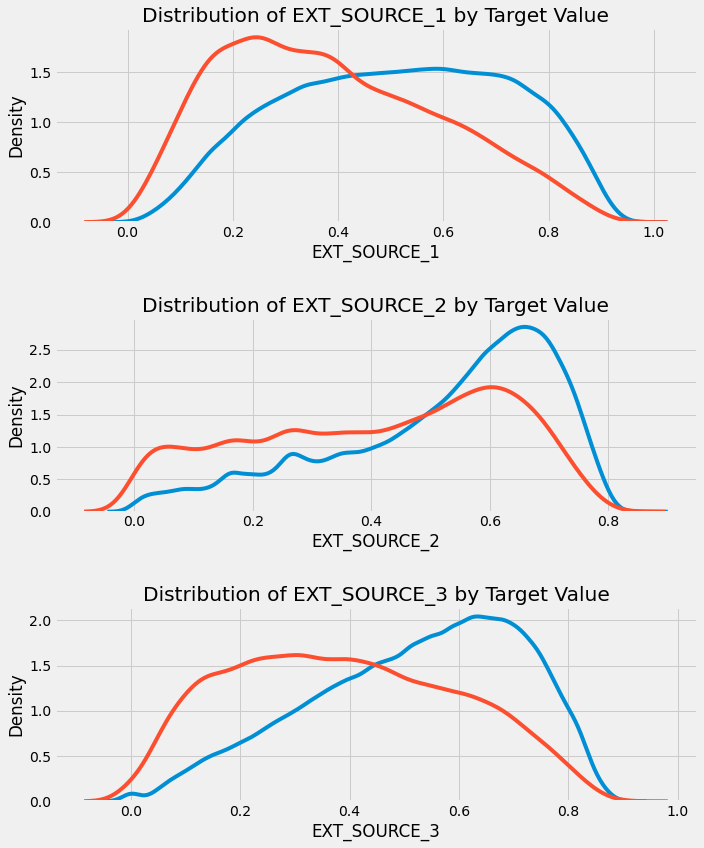

In [31]:
# EXT_SOURCE1,2,3을 TARGET값 별로 나눠서 kdeplot 으로 시각화 하였다.
plt.figure(figsize=(10,12))

for i, source in enumerate(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']):
    # subplot 으로 나누어 주기
    plt.subplot(3,1,i+1)
    
    # target 별로 kdeplot 나타내기
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label='target==0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source],label='target==1')
    
    # title과 x축, y축 지정
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');

# 높이 조정
plt.tight_layout(h_pad=2.5)

'''
EXT_SOURCE_2 와 EXT_SOURCE_3은 target값에 따라 차이가 나타나는 것을 확인할 수 있다.
target 과의 상관계수가 많이 높지는 않았지만, 
target이 0인지 1인지에 따라 값이 다른것으로 보아 모델에 영향을 주는 주요 변수라고 판단할 수 있다.
'''

### EDA 5 : 범주형 변수

column type 수를 확인 했을 때, string을 포함한 범주형 변수가 있었다. 각 변수마다 target 분포를 확인해 보고 encoding할 필요가 있다.

In [32]:
# column type 수 확인
app_train.dtypes.value_counts()

# int64 와 float64 는 수치형 변수이고 object는 string을 포함한 범주형 변수이다. 나중에 encoding 할 필요가 있어보인다. 

float64    67
int64      39
object     16
bool        1
dtype: int64

In [33]:
# object 변수 list로 바꾸어 확인
object_columns = app_train.dtypes[app_train.dtypes == 'object'].index.tolist()
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

- 'NAME_CONTRACT_TYPE' : 대출유형
- 'CODE_GENDER': 성별
- 'FLAG_OWN_CAR': 차 소유 여부
- 'FLAG_OWN_REALTY': 부동산 소유 여부
- 'NAME_TYPE_SUITE': 동행고객
- 'NAME_INCOME_TYPE': 소득유형
- 'NAME_EDUCATION_TYPE': 고객 교육 레벨
- 'NAME_FAMILY_STATUS': 고객 가족 유형
- 'NAME_HOUSING_TYPE': 주택 유형
- 'OCCUPATION_TYPE': 직업 유형
- 'WEEKDAY_APPR_PROCESS_START': 대출신청 시작요일
- 'ORGANIZATION_TYPE': 고객 직장 유형
- 'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE' : 고객 거주지역 특정값

이 중에서 대출 상환 여부와 관련될 수 있는 'CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_HOUSING_TYPE','OCCUPATION_TYPE'에 대하여 살펴보겠다.

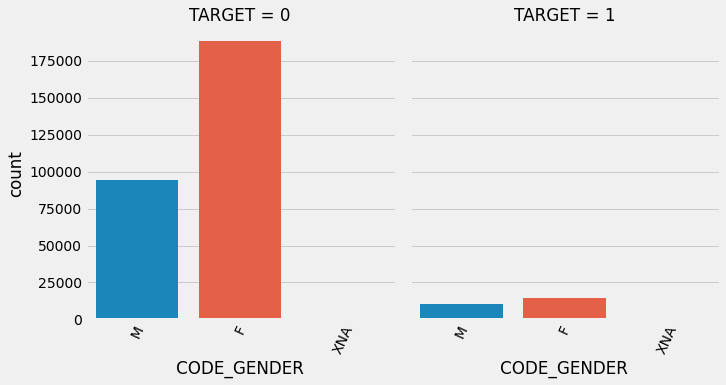

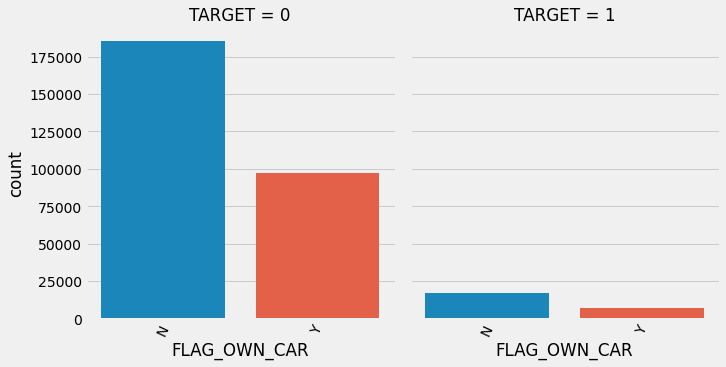

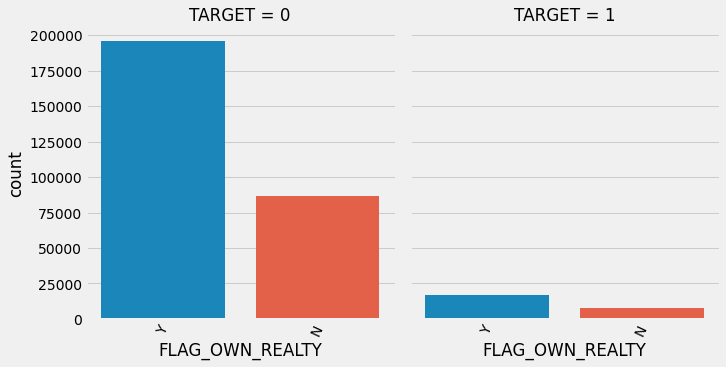

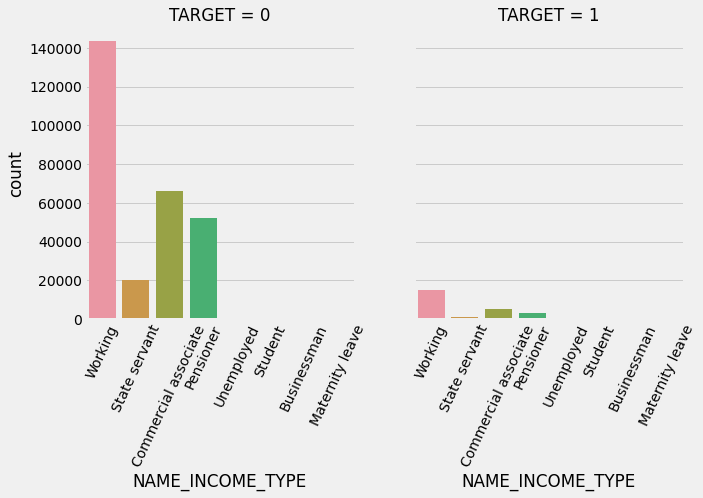

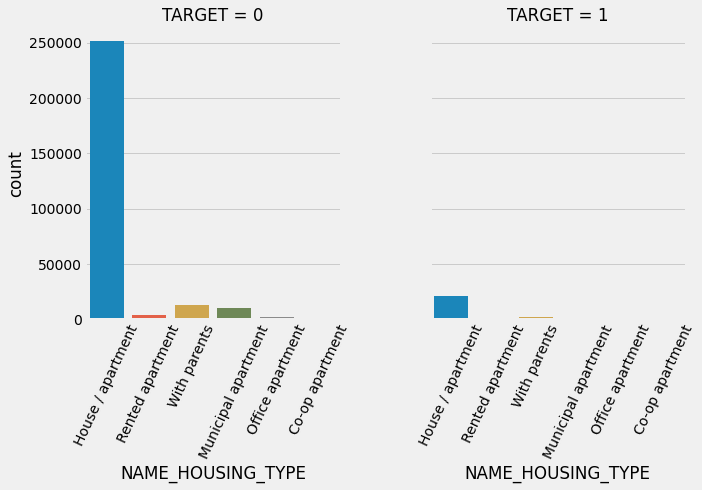

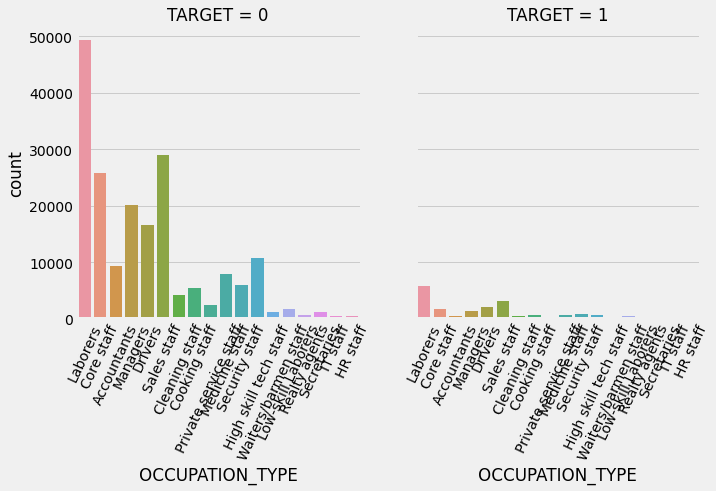

In [34]:
# 각각의 변수마다 target 분포를 확인하였다.

obj =['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_HOUSING_TYPE',
      'OCCUPATION_TYPE']

def show_category_by_target(df, columns):
    for column in columns:
        chart = sns.catplot(x=column, col='TARGET', data=df, kind='count')
        chart.set_xticklabels(rotation=65)

show_category_by_target(app_train, obj)

In [35]:
# target 값에 따른 분포를 살펴보았다.
cond_1 = (app_train['TARGET'] == 1)
cond_0 = (app_train['TARGET'] == 0)

for a in obj:
    print(a)
    print('\n연체인 경우\n',app_train[cond_1][a].value_counts()/app_train[cond_1].shape[0])
    print('\n연체가 아닌 경우\n',app_train[cond_0][a].value_counts()/app_train[cond_0].shape[0])
    print('----------------------------')

CODE_GENDER

연체인 경우
 F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

연체가 아닌 경우
 F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64
----------------------------
FLAG_OWN_CAR

연체인 경우
 N    0.694824
Y    0.305176
Name: FLAG_OWN_CAR, dtype: float64

연체가 아닌 경우
 N    0.656824
Y    0.343176
Name: FLAG_OWN_CAR, dtype: float64
----------------------------
FLAG_OWN_REALTY

연체인 경우
 Y    0.684109
N    0.315891
Name: FLAG_OWN_REALTY, dtype: float64

연체가 아닌 경우
 Y    0.694513
N    0.305487
Name: FLAG_OWN_REALTY, dtype: float64
----------------------------
NAME_INCOME_TYPE

연체인 경우
 Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

연체가 아닌 경우
 Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356


**결과**
- 'CODE_GENDER': 연체가 아닌 경우에 비해 남성이 연체인 경우에 비율이 높게 나타났다. 
- 'FLAG_OWN_CAR': 연체인 경우와 연체가 아닌 경우의 차이가 크지 않다.
- 'FLAG_OWN_REALTY': 연체인 경우와 연체가 아닌 경우의 차이가 크지 않다. 
- 'NAME_INCOME_TYPE': State servant, working, unemployed 비율이 연체일 때 더 크게 나타났다. 
- 'NAME_HOUSING_TYPE': 빌린 집에서 살거나 부모님과 함께 살 때 연체 비율이 더 크게 나타났다.
- 'OCCUPATION_TYPE': 노동자, 드라이버, 보안 직무 종사자들의 연체 비율이 더 크게 나타났다. 

### EDA 6 : 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE'

- 'AMT_CREDIT': 대출금액
- 'AMT_INCOME_TOTAL' : 고객 소득
- 'AMT_ANNUITY' : 월 대출 지급액
- 'AMT_GOODS_PRICE' : 소비자 대출 상품액

In [36]:
# 상관 관계를 도출해 보았다.
amt=app_train[['TARGET','AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE']]
amtcorr = amt.corr()
amtcorr

,TARGET,AMT_CREDIT,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_GOODS_PRICE
TARGET,1.000000,-0.030369,-0.003982,-0.012817,-0.039645
AMT_CREDIT,-0.030369,1.000000,0.156870,0.770138,0.986968
AMT_INCOME_TOTAL,-0.003982,0.156870,1.000000,0.191657,0.159610
AMT_ANNUITY,-0.012817,0.770138,0.191657,1.000000,0.775109
AMT_GOODS_PRICE,-0.039645,0.986968,0.159610,0.775109,1.000000


"\nAMT_CREDIT과 AMT_ANNUITY 의 상관관계는 0.77로 높았다. 월 대출금액이 높으면 대출 금액도 높아지는 것은 당연한 결과이다.\nTARGET 과 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY' 변수들은 모두 음의 상관관계를 나타내었다. 하지만 그 정도는 크지 않다.\n'AMT_INCOME_TOTAL'(고객소득)은 'AMT_CREDIT'와 'AMT_ANNUITY'와 양의 상관관계를 갖는다. \n고객의 소득이 클 수록 대출 금액도 커진다는 것을 유추할 수 있다.\n'AMT_GOODS_PRICE'는 'AMT_CREDIT'과 'AMT_ANNUITY' 변수와 높은 양의 상관관계를 갖는다. \n"

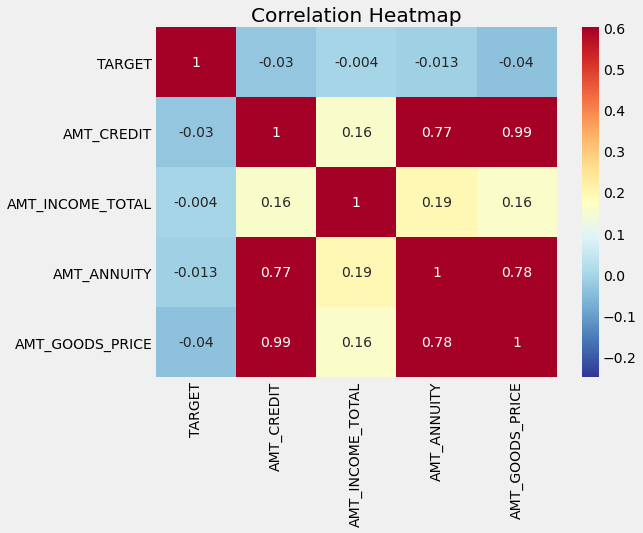

In [37]:
# 상관관계로 히트맵을 그려보았다.
plt.figure(figsize=(8,6))
sns.heatmap(amtcorr, cmap=plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title('Correlation Heatmap');

'''
AMT_CREDIT과 AMT_ANNUITY 의 상관관계는 0.77로 높았다. 월 대출금액이 높으면 대출 금액도 높아지는 것은 당연한 결과이다.
TARGET 과 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY' 변수들은 모두 음의 상관관계를 나타내었다. 하지만 그 정도는 크지 않다.
'AMT_INCOME_TOTAL'(고객소득)은 'AMT_CREDIT'와 'AMT_ANNUITY'와 양의 상관관계를 갖는다. 
고객의 소득이 클 수록 대출 금액도 커진다는 것을 유추할 수 있다.
'AMT_GOODS_PRICE'는 'AMT_CREDIT'과 'AMT_ANNUITY' 변수와 높은 양의 상관관계를 갖는다. 
'''

'\ntarget값에 따라서 큰 차이를 보이지는 않는다. 이는 feature engineering을 통해 target 값 간의 차이를 넓힐 수 있음을 의미할 수 있다.\n'

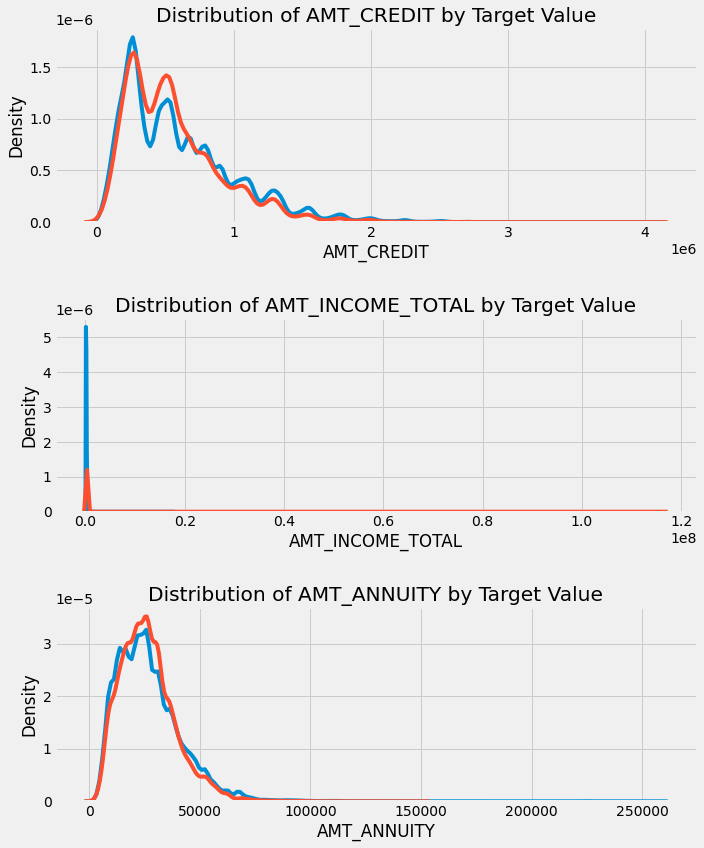

In [38]:
# 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY'을 TARGET값 별로 나눠서 kdeplot 으로 시각화 하였다.
plt.figure(figsize=(10,12))

for i, source in enumerate(['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']):
    # subplot 으로 나누어 주기
    plt.subplot(3,1,i+1)
    
    # target 별로 kdeplot 나타내기
    sns.kdeplot(app_train.loc[app_train['TARGET']==0,source],label='target==0')
    sns.kdeplot(app_train.loc[app_train['TARGET']==1,source],label='target==1')
    
    # title과 x축, y축 지정
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' %source);
    plt.ylabel('Density');

# 높이 조정
plt.tight_layout(h_pad=2.5)

'''
target값에 따라서 큰 차이를 보이지는 않는다. 이는 feature engineering을 통해 target 값 간의 차이를 넓힐 수 있음을 의미할 수 있다.
'''

### 결측값 확인

In [39]:
# 함수를 만들어 결측값의 유무를 확인한다. 
def missing_values_table(df):
        # 총 결측값
        miss = df.isnull().sum()
        
        # 결측값 비율
        miss_percent = 100 * miss / len(df)
        
        # 표 만들기
        mis_table = pd.concat([miss, miss_percent], axis=1)
        
        # column 이름 다시 설정
        mis_val_table = mis_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # 결측값 비율 높은 순으로 내림차순 하기
        mis_val_table = mis_val_table[
            mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # 정보 요약
        print ("선택된 데이터프레임은 " + str(df.shape[1]) + "개의 컬럼이 있다.\n"      
            "그중에서 " + str(mis_val_table.shape[0]) +
              " 개는 결측값이 있는 컬럼이다.")
        
        return mis_val_table

In [40]:
# 결측값 통계
missing_values = missing_values_table(app_train)
missing_values.head(20)

선택된 데이터프레임은 123개의 컬럼이 있다.
그중에서 68 개는 결측값이 있는 컬럼이다.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


### 데이터 가공 전 training data, testing data 결합

In [41]:
app_train.shape, app_test.shape

((307511, 123), (48744, 122))

In [42]:
apps = pd.concat([app_train,app_test])
print(apps.shape)

(356255, 123)


In [43]:
apps['TARGET'].value_counts(dropna=False)

0.0    282686
NaN     48744
1.0     24825
Name: TARGET, dtype: int64

## Feature Engineering : Application data

### 범주형 변수 Label Encoding

In [44]:
# 범주형 변수를 리스트로 만든 후에 인코딩 진행
object_col = apps.dtypes[apps.dtypes == 'object'].index.tolist()
for column in object_col:
    apps[column] = pd.factorize(apps[column])[0]

In [45]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356255 entries, 0 to 48743
Columns: 123 entries, SK_ID_CURR to DAYS_EMPLOYED_ANOM
dtypes: bool(1), float64(68), int64(54)
memory usage: 334.7 MB


### FE1 : 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY','AMT_GOODS_PRICE'

다음과 같은 새로운 변수를 추가하였다.
- CREDIT_INCOME_PERCENT: 고객의 수입에 대한 대출 금액 비율 
- ANNUITY_INCOME_PERCENT: 고객이 수입에 대한 월 대출 금액 비율
- CREDIT_TERM: 대출 갚는 기간 (월 단위)
- GOODS_CREDIT_RATIO: 총 대출 금액에 대한 대출 상품 금액 비율
- CREDIT_GOODS_DIFF: 총 대출 금액 - 대출 상품 금액
- GOODS_INCOME_RATIO : 고객 수입에 대한 대출 상품 금액 비율

In [46]:
# 새로운 변수 추가
apps['CREDIT_INCOME_PERCENT'] = apps['AMT_CREDIT'] / apps['AMT_INCOME_TOTAL']
apps['ANNUITY_INCOME_PERCENT'] = apps['AMT_ANNUITY'] / apps['AMT_INCOME_TOTAL']
apps['CREDIT_TERM'] = apps['AMT_ANNUITY'] / apps['AMT_CREDIT']
apps['GOODS_CREDIT_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_CREDIT']
apps['CREDIT_GOODS_DIFF'] = apps['AMT_CREDIT'] - apps['AMT_GOODS_PRICE']
apps['GOODS_INCOME_RATIO'] = apps['AMT_GOODS_PRICE']/apps['AMT_INCOME_TOTAL']

### FE2 : 'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'

다음과 같은 새로운 변수를 추가 하였다.
- 'APPS_EXT_SOURCE_MEAN': EXT_SOURCE 들의 평균
- 'APPS_EXT_SOURCE_STD' : EXT_SOURCE 들의 표준편차

In [47]:
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN


In [48]:
# column 방향으로 평균 구하기
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

0        0.161787
1        0.466757
2        0.642739
3        0.650442
4        0.322738
           ...   
48739    0.645800
48740    0.684596
48741    0.549995
48742    0.471416
48743    0.364337
Length: 356255, dtype: float64

In [49]:
# 상관관계가 높은 것에 대해 너무 가공하면 성능이 오히려 떨어질 수 있으므로 mean과 std 만 구하였다.
apps['APPS_EXT_SOURCE_MEAN'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
apps['APPS_EXT_SOURCE_STD'] = apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)

In [50]:
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APPS_EXT_SOURCE_MEAN','APPS_EXT_SOURCE_STD']].head(10)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.083037,0.262949,0.139376,0.161787,0.092026
1,0.311267,0.622246,NaN,0.466757,0.219895
2,NaN,0.555912,0.729567,0.642739,0.122792
3,NaN,0.650442,NaN,0.650442,NaN
4,NaN,0.322738,NaN,0.322738,NaN
5,NaN,0.354225,0.621226,0.487726,0.188799
6,0.774761,0.724000,0.492060,0.663607,0.150717
7,NaN,0.714279,0.540654,0.627467,0.122771
8,0.587334,0.205747,0.751724,0.514935,0.280096
9,NaN,0.746644,NaN,0.746644,NaN


In [51]:
# 'APPS_EXT_SOURCE_STD'의 NULL 값 평균으로 채우기
apps['APPS_EXT_SOURCE_STD'] = apps['APPS_EXT_SOURCE_STD'].fillna(apps['APPS_EXT_SOURCE_STD'].mean())

In [52]:
apps[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APPS_EXT_SOURCE_MEAN','APPS_EXT_SOURCE_STD']].head(10)

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD
0,0.083037,0.262949,0.139376,0.161787,0.092026
1,0.311267,0.622246,NaN,0.466757,0.219895
2,NaN,0.555912,0.729567,0.642739,0.122792
3,NaN,0.650442,NaN,0.650442,0.151008
4,NaN,0.322738,NaN,0.322738,0.151008
5,NaN,0.354225,0.621226,0.487726,0.188799
6,0.774761,0.724000,0.492060,0.663607,0.150717
7,NaN,0.714279,0.540654,0.627467,0.122771
8,0.587334,0.205747,0.751724,0.514935,0.280096
9,NaN,0.746644,NaN,0.746644,0.151008


### FE3 : 'DAYS_BIRTH', 'DAYS_EMPLOYED'

다음과 같은 새로운 변수를 추가하였다.
- 'EMPLOYED_BIRTH_RATIO' : 고객 나이에 대해 일한 날짜 비율
- 'INCOME_EMPLOYED_RATIO' : 직업 유지 기간에 대한 총 수입 비율
- 'INCOME_BIRTH_RATIO' : 고객 나이에 대한 총 수입 비율
- 'CAR_BIRTH_RATIO' : 고객 나이에 대한 소유 차량 연식
- 'CAR_EMPLOYED_RATIO' : 직업 유지 기간에 대한 소유 차량 연식

In [53]:
# DAYS_BIRTH, DAYS_EMPLOYED 비율로 소득/자산 관련 Feature 가공

apps['EMPLOYED_BIRTH_RATIO'] = apps['DAYS_EMPLOYED']/apps['DAYS_BIRTH']
apps['INCOME_EMPLOYED_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_EMPLOYED']
apps['INCOME_BIRTH_RATIO'] = apps['AMT_INCOME_TOTAL']/apps['DAYS_BIRTH']
apps['CAR_BIRTH_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_BIRTH']
apps['CAR_EMPLOYED_RATIO'] = apps['OWN_CAR_AGE'] / apps['DAYS_EMPLOYED']

### Null 값 일괄 변환

In [54]:
apps.isnull().sum().head(100)

SK_ID_CURR                           0
TARGET                           48744
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         36
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                      0
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                    64648
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     235241
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

## EDA : CREDIT CARD BALANCE data

In [55]:
ccb = pd.read_csv('../input/home-credit-default-risk/credit_card_balance.csv')

In [56]:
ccb.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [57]:
ccb.shape

(3840312, 23)

In [58]:
# application_train 데이터와 credit_card_balance 데이터 merge
app_ccb = ccb.merge(app_train, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='outer')
app_ccb.shape

(4060918, 145)

### Null 값 확인

In [59]:
missing_values = missing_values_table(ccb)
missing_values.head(20)

선택된 데이터프레임은 23개의 컬럼이 있다.
그중에서 9 개는 결측값이 있는 컬럼이다.


,Missing Values,% of Total Values
AMT_PAYMENT_CURRENT,767988,20.0
AMT_DRAWINGS_ATM_CURRENT,749816,19.5
AMT_DRAWINGS_OTHER_CURRENT,749816,19.5
AMT_DRAWINGS_POS_CURRENT,749816,19.5
CNT_DRAWINGS_ATM_CURRENT,749816,19.5
CNT_DRAWINGS_OTHER_CURRENT,749816,19.5
CNT_DRAWINGS_POS_CURRENT,749816,19.5
AMT_INST_MIN_REGULARITY,305236,7.9
CNT_INSTALMENT_MATURE_CUM,305236,7.9


### SK_ID_CURR당 평균 SK_ID_PREV 건수 확인

In [60]:
app_ccb.groupby('SK_ID_CURR').count()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
100006,6,6,6,6,0,6,0,0,6,0,6,6,6,6,0,6,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0,0,0,0,0,0,6
10

In [61]:
app_ccb.groupby('SK_ID_CURR')['SK_ID_CURR'].count()

SK_ID_CURR
100002    1
100003    1
100004    1
100006    6
100007    1
         ..
456251    1
456252    1
456253    1
456254    1
456255    1
Name: SK_ID_CURR, Length: 324164, dtype: int64

12.527356523241322


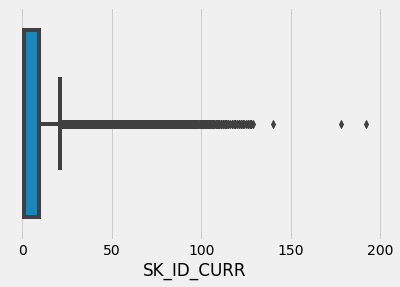

In [62]:
# boxplot 으로 시각화, 평균

sns.boxplot(app_ccb.groupby('SK_ID_CURR')['SK_ID_CURR'].count())
print(app_ccb.groupby('SK_ID_CURR')['SK_ID_CURR'].count().mean())

# 이상값이 많지 않고 평균이 37 정도이다. 

### EDA1 : 범주형 변수

In [63]:
categorical_features = ccb.select_dtypes(include = ["object"]).columns
numerical_features = ccb.select_dtypes(exclude = ["object"]).columns
print(categorical_features)
print(numerical_features)

Index(['NAME_CONTRACT_STATUS'], dtype='object')
Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF'],
      dtype='object')


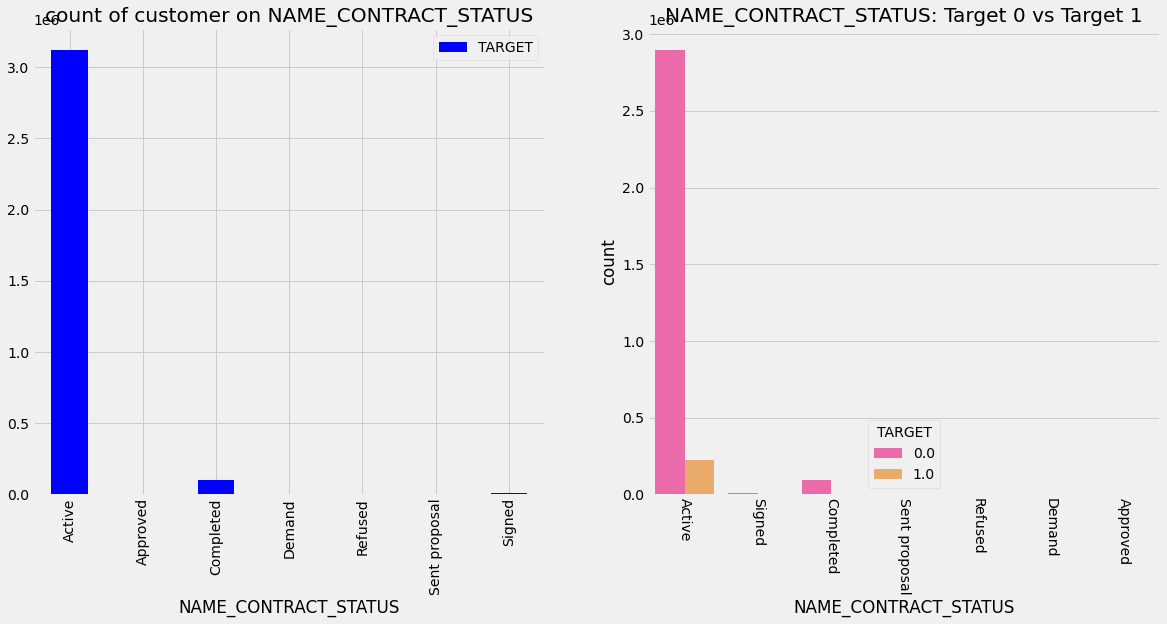

"\ntarget이 1인 값의 'NAME_CONTRACT_STATUS'(계약 상태)는 Active인 경우가 많았다.\n"

In [64]:
# 'NAME_CONTRACT_STATUS' 의 target 분포 시각화
def plot_re(df,t1='',t2=''):
    f,ax=plt.subplots(1,2,figsize=(18,8))
    df[[t1,t2]].groupby([t1]).count().plot.bar(ax=ax[0],color='Blue')
    ax[0].set_title('count of customer on '+t1)
    sns.countplot(t1,hue=t2,data=df,ax=ax[1],palette="spring")
    ax[1].set_title(t1+': Target 0 vs Target 1')
    # Rotate x-labels
    plt.xticks(rotation=-90)
    a=plt.show()
    return a

plot_re(app_ccb,'NAME_CONTRACT_STATUS','TARGET')

'''
target이 1인 값의 'NAME_CONTRACT_STATUS'(계약 상태)는 Active인 경우가 많았다.
'''

In [65]:
# crosstab 으로 보면, 0에서 completed 비율이 1보다 더 높은 것을 알 수 있다.
pd.crosstab(app_ccb.TARGET, app_ccb.NAME_CONTRACT_STATUS, dropna=False, normalize='all')

NAME_CONTRACT_STATUS,Active,Approved,Completed,Demand,Refused,Sent proposal,Signed
TARGET,,,,,,,
0.0,0.896522,0.000002,0.029000,0.000209,3.717512e-06,0.000137,0.002874
1.0,0.069001,0.000000,0.001989,0.000052,6.195854e-07,0.000006,0.000205


### EDA2 : 수치형 변수

In [66]:
# 시각화를 위한 함수 만들어 놓기
def show_hist_by_target(df, columns):
    cond_1 = (df['TARGET'] == 1)
    cond_0 = (df['TARGET'] == 0)
    
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), squeeze=False)
        sns.violinplot(x='TARGET', y=column, data=df, ax=axs[0][0] )
        sns.distplot(df[cond_0][column], ax=axs[0][1], label='0', color='blue')
        sns.distplot(df[cond_1][column], ax=axs[0][1], label='1', color='red')   

In [67]:
# app_train[['SK_ID_CURR', 'TARGET']] 두가지 컬럼만 갖고 옴
# on='SK_ID_CURR' 컬럼 기준으로 조인

app_ccb_target = ccb.merge(app_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
app_ccb_target.shape

(3840312, 24)

In [68]:
# 수치형 변수 리스트로 만들기
num_columns = app_ccb_target.dtypes[app_ccb_target.dtypes != 'object'].index.tolist()

In [69]:
# 'SK_ID_PREV','SK_ID_CURR','TARGET' 컬럼 필요없음

num_columns = [column for column in num_columns if column not in ['SK_ID_PREV', 'SK_ID_CURR', 'TARGET']]
num_columns

['MONTHS_BALANCE',
 'AMT_BALANCE',
 'AMT_CREDIT_LIMIT_ACTUAL',
 'AMT_DRAWINGS_ATM_CURRENT',
 'AMT_DRAWINGS_CURRENT',
 'AMT_DRAWINGS_OTHER_CURRENT',
 'AMT_DRAWINGS_POS_CURRENT',
 'AMT_INST_MIN_REGULARITY',
 'AMT_PAYMENT_CURRENT',
 'AMT_PAYMENT_TOTAL_CURRENT',
 'AMT_RECEIVABLE_PRINCIPAL',
 'AMT_RECIVABLE',
 'AMT_TOTAL_RECEIVABLE',
 'CNT_DRAWINGS_ATM_CURRENT',
 'CNT_DRAWINGS_CURRENT',
 'CNT_DRAWINGS_OTHER_CURRENT',
 'CNT_DRAWINGS_POS_CURRENT',
 'CNT_INSTALMENT_MATURE_CUM',
 'SK_DPD',
 'SK_DPD_DEF']

'\n결과 : 분포에 있어서 target 0,1이 서로 차이가 조금 나는 변수는 MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, \nAMT_INST_MIN_REGULARITY,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM 이 해당된다. \n하지만 MONTHS_BALANCE는 신청일 기준 잔액 월을 의미하므로 큰 상관관계는 없을 것으로 예상된다. \n이어서 상관관계 분석을 통해 유의미한 변수를 추려내겠다.\n'

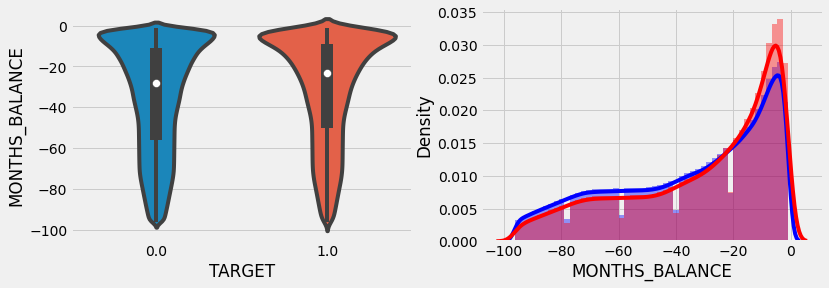

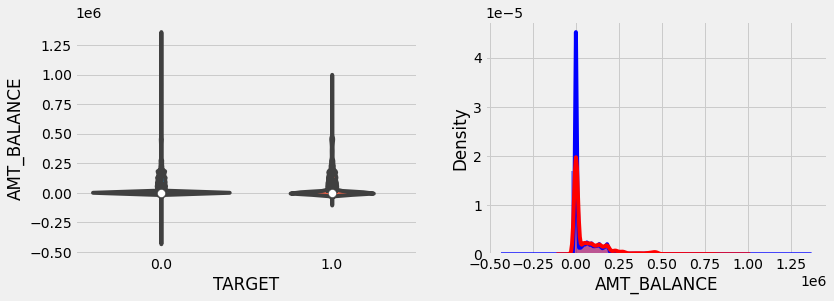

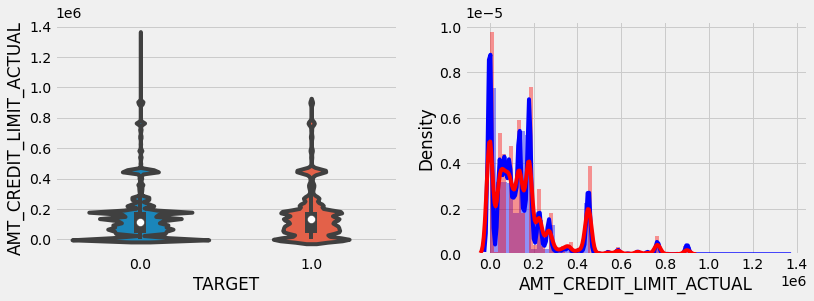

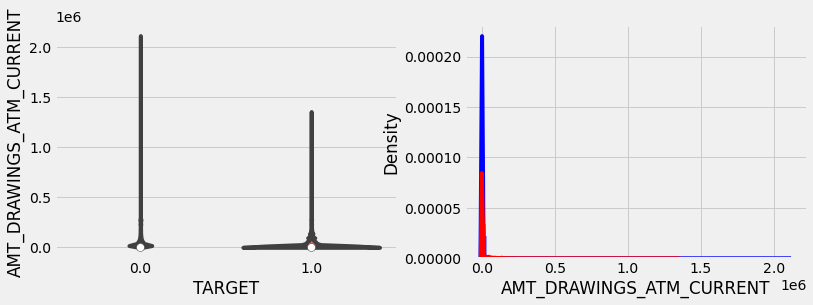

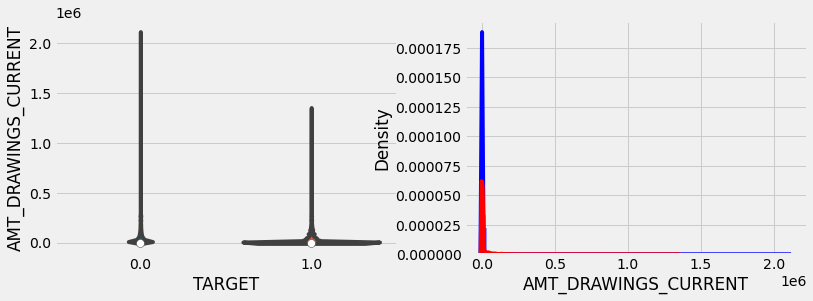

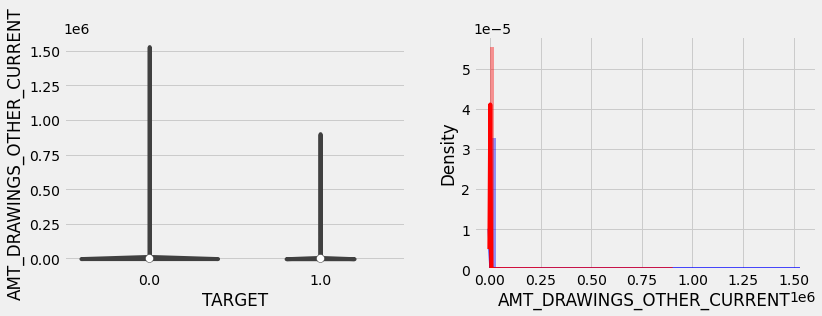

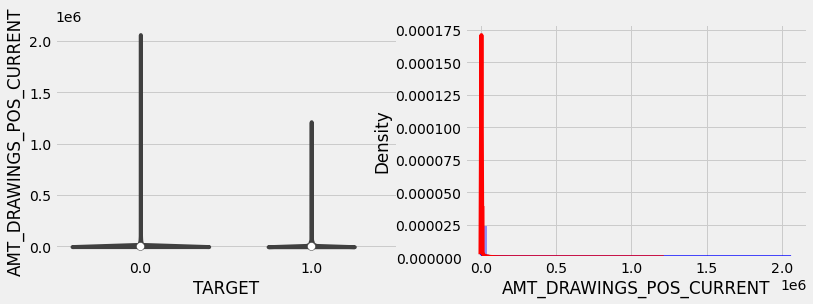

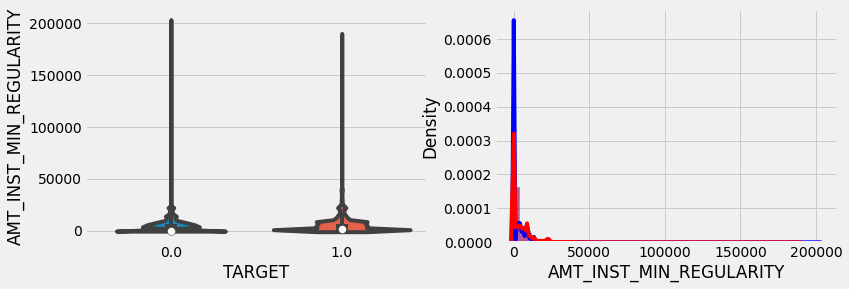

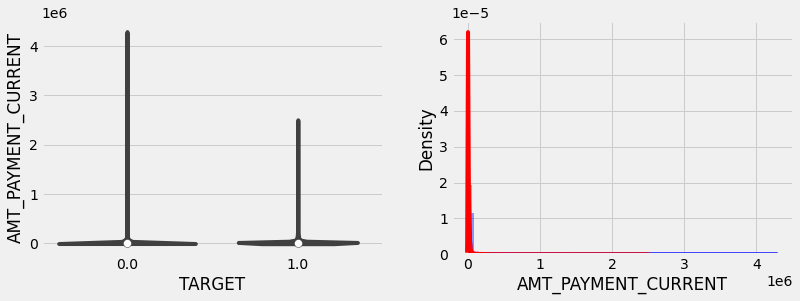

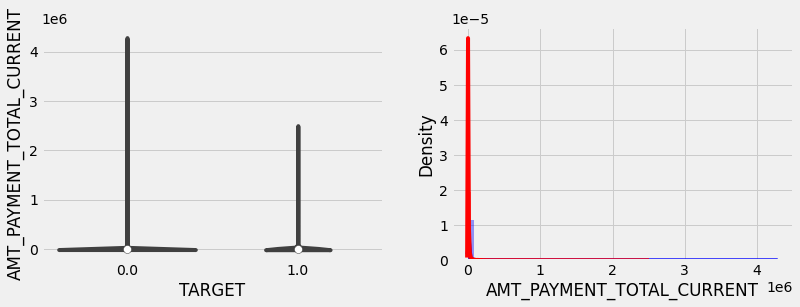

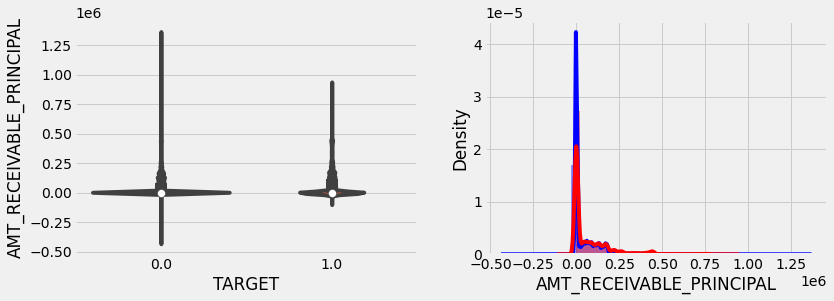

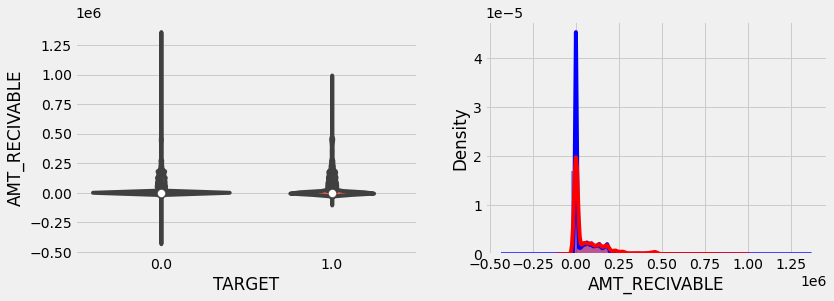

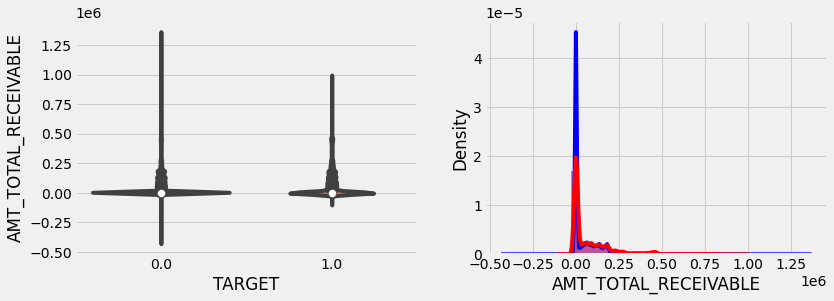

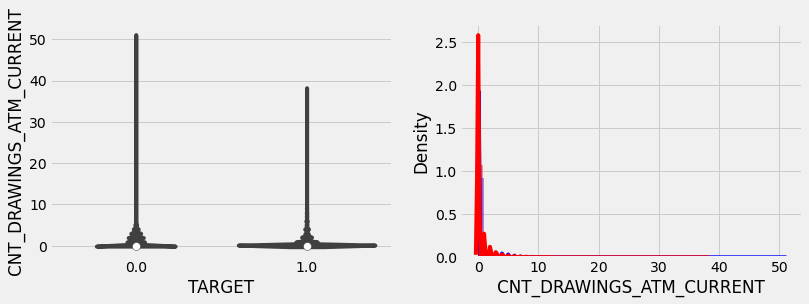

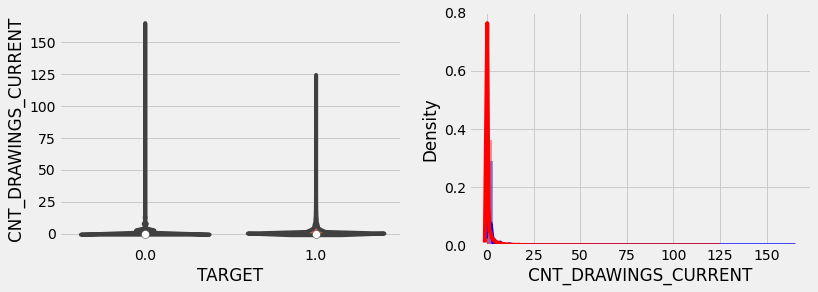

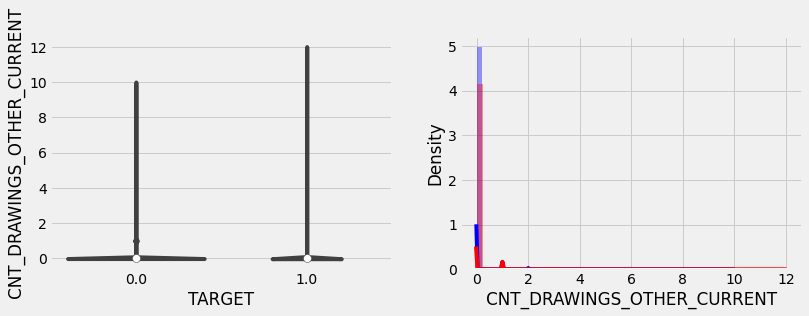

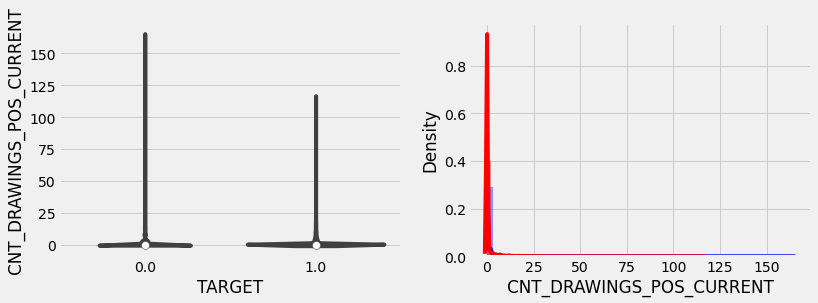

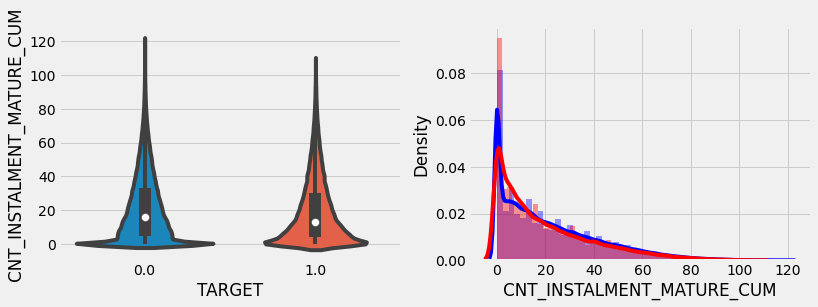

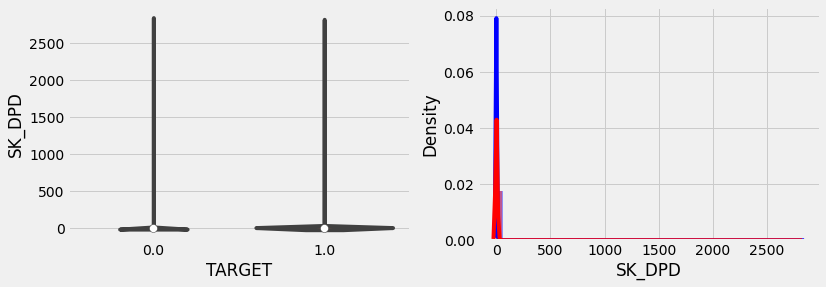

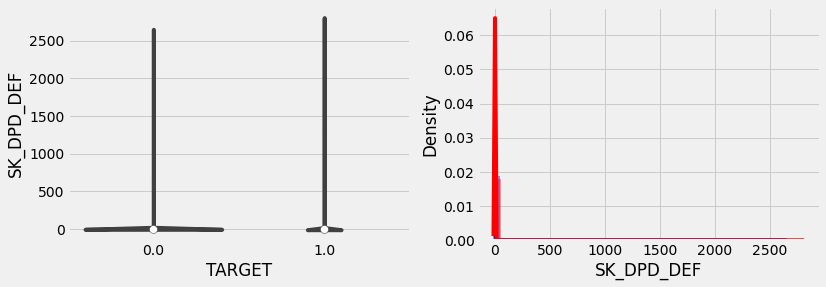

In [70]:
# 시각화를 위해 show_hist_by_target 함수 호출

show_hist_by_target(app_ccb_target, num_columns)

'''
결과 : 분포에 있어서 target 0,1이 서로 차이가 조금 나는 변수는 MONTHS_BALANCE, AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, 
AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM 이 해당된다. 
하지만 MONTHS_BALANCE는 신청일 기준 잔액 월을 의미하므로 큰 상관관계는 없을 것으로 예상된다. 
이어서 상관관계 분석을 통해 유의미한 변수를 추려내겠다.
'''

### EDA3 :  상관관계 분석

In [71]:
# target 변수와 다른 변수들간의 상관관계를 살펴보았다. 그리고 sorting 하였다. 
correlations = app_ccb_target.corr()['TARGET'].sort_values()

# 양의 상관관계 높은 것 15개, 음의 상관관계 높은 것 15개 나타내기
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

'''
결과 : AMT_BALANCE ,AMT_TOTAL_RECEIVABLE ,AMT_RECIVABLE 는 target과 양의 상관관계가 있고, 
CNT_INSTALMENT_MATURE_CUM는 음의 상관관계를 갖고 있다. 이 4개의 변수는 위에서 했던 시각화에서 확인할 수 있었듯이 유의미해 보인다.
AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,
AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM 을 더 자세히 살펴보겠다.
'''

Most Positive Correlations:
 AMT_PAYMENT_TOTAL_CURRENT    0.012302
AMT_PAYMENT_CURRENT          0.012929
AMT_CREDIT_LIMIT_ACTUAL      0.013823
AMT_DRAWINGS_CURRENT         0.022378
AMT_DRAWINGS_ATM_CURRENT     0.024700
CNT_DRAWINGS_POS_CURRENT     0.029536
MONTHS_BALANCE               0.035695
CNT_DRAWINGS_CURRENT         0.037793
CNT_DRAWINGS_ATM_CURRENT     0.038437
AMT_INST_MIN_REGULARITY      0.039798
AMT_RECEIVABLE_PRINCIPAL     0.049692
AMT_RECIVABLE                0.049803
AMT_TOTAL_RECEIVABLE         0.049839
AMT_BALANCE                  0.050098
TARGET                       1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 CNT_INSTALMENT_MATURE_CUM    -0.023684
SK_ID_CURR                   -0.004617
SK_DPD                        0.001684
SK_ID_PREV                    0.002571
CNT_DRAWINGS_OTHER_CURRENT    0.003044
AMT_DRAWINGS_OTHER_CURRENT    0.003843
AMT_DRAWINGS_POS_CURRENT      0.005084
SK_DPD_DEF                    0.010538
AMT_PAYMENT_TOTAL_CURRENT     

'\n결과 : AMT_BALANCE ,AMT_TOTAL_RECEIVABLE ,AMT_RECIVABLE 는 target과 양의 상관관계가 있고, \nCNT_INSTALMENT_MATURE_CUM는 음의 상관관계를 갖고 있다. 이 4개의 변수는 위에서 했던 시각화에서 확인할 수 있었듯이 유의미해 보인다.\nAMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,\nAMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM 을 더 자세히 살펴보겠다.\n'

### EDA4 : AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,AMT_RECIVABLE, AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM

target 별 분포와 상관관계로 유의미한 변수라고 추려낸 6개의 변수를 더 자세히 살펴보겠다.
(AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,
AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM )

- AMT_BALANCE : 대출 월별 잔액
- AMT_CREDIT_LIMIT_ACTUAL : 월별 카드 허용 한도
- AMT_INST_MIN_REGULARITY : 최소 할부 납입 금액
- AMT_TOTAL_RECEIVABLE : 총 원금 회수 금액
- AMT_RECIVABLE : 대출 원금 회수 금액
- CNT_INSTALMENT_MATURE_CUM : 대출 납부 횟수


Text(0.5, 1.0, 'AMT_CREDIT_LIMIT_ACTUAL')

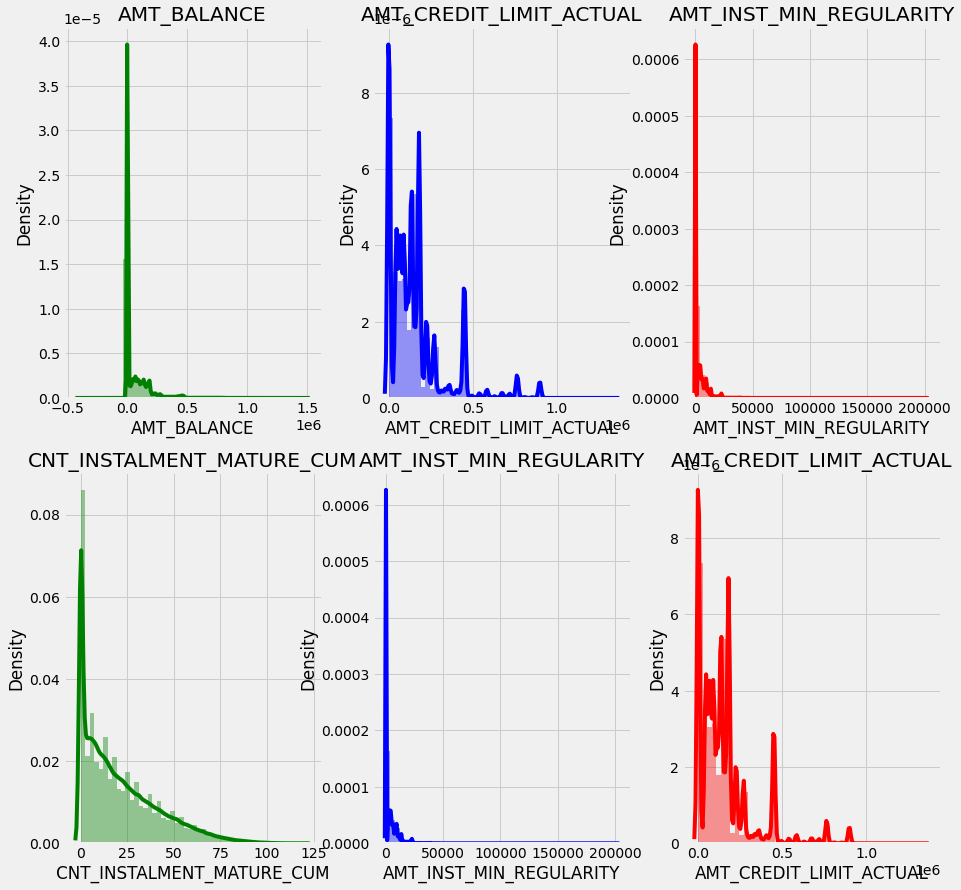

In [72]:
'''
AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,AMT_RECIVABLE,
AMT_TOTAL_RECEIVABLE,CNT_INSTALMENT_MATURE_CUM  시각화
'''
f, ax = plt.subplots(2,3,figsize=(14,14))

# AMT_BALANCE
sns.distplot(app_ccb.AMT_BALANCE.dropna(), kde=True, color='g',
            ax=ax[0,0]).set_title('AMT_BALANCE')
# AMT_CREDIT_LIMIT_ACTUAL
sns.distplot(app_ccb.AMT_CREDIT_LIMIT_ACTUAL.dropna(), kde=True, color='b',
            ax=ax[0,1]).set_title('AMT_CREDIT_LIMIT_ACTUAL')
# AMT_INST_MIN_REGULARITY
sns.distplot(app_ccb.AMT_INST_MIN_REGULARITY.dropna(), kde=True, color='r',
            ax=ax[0,2]).set_title('AMT_INST_MIN_REGULARITY')
# CNT_INSTALMENT_MATURE_CUM
sns.distplot(app_ccb.CNT_INSTALMENT_MATURE_CUM.dropna(), kde=True, color='g',
            ax=ax[1,0]).set_title('CNT_INSTALMENT_MATURE_CUM')
# AMT_INST_MIN_REGULARITY
sns.distplot(app_ccb.AMT_INST_MIN_REGULARITY.dropna(), kde=True, color='b',
            ax=ax[1,1]).set_title('AMT_INST_MIN_REGULARITY')
# AMT_CREDIT_LIMIT_ACTUAL
sns.distplot(app_ccb.AMT_CREDIT_LIMIT_ACTUAL.dropna(), kde=True, color='r',
            ax=ax[1,2]).set_title('AMT_CREDIT_LIMIT_ACTUAL')



In [73]:
# mean, median, count 타겟별로 조사해보기

print(app_ccb_target.groupby('TARGET').agg({'AMT_BALANCE': ['mean', 'median', 'count','sum','max']}))
print(app_ccb_target.groupby('TARGET').agg({'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'median', 'count','sum','max']}))
print(app_ccb_target.groupby('TARGET').agg({'AMT_INST_MIN_REGULARITY': ['mean', 'median', 'count','sum','max']}))
print(app_ccb_target.groupby('TARGET').agg({'CNT_INSTALMENT_MATURE_CUM': ['mean', 'median', 'count','sum','max']}))
print(app_ccb_target.groupby('TARGET').agg({'AMT_INST_MIN_REGULARITY': ['mean', 'median', 'count','sum','max']}))
print(app_ccb_target.groupby('TARGET').agg({'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 'median', 'count','sum','max']}))

'''
AMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,
AMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY 는 TARGET=1일 경우에 mean이 높다.

CNT_INSTALMENT_MATURE_CUM는 타겟이 0인 경우에 평균이 더 높다.
max 값은 0이 모두 다 크다. 
'''

         AMT_BALANCE                                             
                mean   median    count           sum          max
TARGET                                                           
0.0     57593.932362    0.000  2997964  1.726645e+11  1354829.265
1.0     78356.503121  135.045   230001  1.802207e+10   981683.100
       AMT_CREDIT_LIMIT_ACTUAL                                        
                          mean  median    count           sum      max
TARGET                                                                
0.0              152326.788614  112500  2997964  456670228500  1350000
1.0              161123.462507  135000   230001   37058557500   900000
       AMT_INST_MIN_REGULARITY                                           
                          mean  median    count           sum         max
TARGET                                                                   
0.0                3537.533612     0.0  2750589  9.730301e+09  202882.005
1.0                

'\nAMT_BALANCE, AMT_CREDIT_LIMIT_ACTUAL, AMT_INST_MIN_REGULARITY,\nAMT_CREDIT_LIMIT_ACTUAL,AMT_INST_MIN_REGULARITY 는 TARGET=1일 경우에 mean이 높다.\n\nCNT_INSTALMENT_MATURE_CUM는 타겟이 0인 경우에 평균이 더 높다.\nmax 값은 0이 모두 다 크다. \n'

## Feature Engineering : CREDIT CARD BALANCE data

In [74]:
# 변수로 받아서 ccb_group에 저장
ccb_group = app_ccb_target.groupby('SK_ID_CURR') 
ccb_group.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,TARGET
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0,NaN
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,1.0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0,NaN
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0,0.0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823349,1125997,145265,-6,0.000,382500,NaN,0.0,NaN,NaN,0.000,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
3823381,2538077,121701,-2,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
3823417,2702735,323731,-2,0.000,67500,NaN,0.0,NaN,NaN,0.000,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0
3823426,2180973,122120,-4,0.000,90000,NaN,0.0,NaN,NaN,0.000,NaN,0.0,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0,0.0


In [75]:
agg_dict = {
    'SK_ID_CURR':['count'],
    'AMT_BALANCE':['mean', 'max', 'sum'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean', 'max', 'sum'], 
    'AMT_INST_MIN_REGULARITY':['mean', 'max', 'sum'],
    'CNT_INSTALMENT_MATURE_CUM':['mean', 'max', 'sum'],
    'AMT_CREDIT_LIMIT_ACTUAL':['mean', 'max', 'sum'],
    'AMT_INST_MIN_REGULARITY':['mean', 'max', 'sum']
}

ccb_amt_agg = ccb_group.agg(agg_dict)
ccb_amt_agg.head()
ccb_amt_agg.shape

(103558, 13)

In [76]:
# MultiIndex로 되어 있는 컬럼명 확인

ccb_amt_agg.columns

MultiIndex([(               'SK_ID_CURR', 'count'),
            (              'AMT_BALANCE',  'mean'),
            (              'AMT_BALANCE',   'max'),
            (              'AMT_BALANCE',   'sum'),
            (  'AMT_CREDIT_LIMIT_ACTUAL',  'mean'),
            (  'AMT_CREDIT_LIMIT_ACTUAL',   'max'),
            (  'AMT_CREDIT_LIMIT_ACTUAL',   'sum'),
            (  'AMT_INST_MIN_REGULARITY',  'mean'),
            (  'AMT_INST_MIN_REGULARITY',   'max'),
            (  'AMT_INST_MIN_REGULARITY',   'sum'),
            ('CNT_INSTALMENT_MATURE_CUM',  'mean'),
            ('CNT_INSTALMENT_MATURE_CUM',   'max'),
            ('CNT_INSTALMENT_MATURE_CUM',   'sum')],
           )

In [77]:
# 컬럼명 변경
ccb_amt_agg.columns = ['CCB_' + ('_').join(column).upper() for column in ccb_amt_agg.columns.ravel()]
ccb_amt_agg.head()

,CCB_SK_ID_CURR_COUNT,CCB_AMT_BALANCE_MEAN,CCB_AMT_BALANCE_MAX,CCB_AMT_BALANCE_SUM,CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX,CCB_AMT_CREDIT_LIMIT_ACTUAL_SUM,CCB_AMT_INST_MIN_REGULARITY_MEAN,CCB_AMT_INST_MIN_REGULARITY_MAX,CCB_AMT_INST_MIN_REGULARITY_SUM,CCB_CNT_INSTALMENT_MATURE_CUM_MEAN,CCB_CNT_INSTALMENT_MATURE_CUM_MAX,CCB_CNT_INSTALMENT_MATURE_CUM_SUM
SK_ID_CURR,,,,,,,,,,,,,
100006,6,0.000000,0.00,0.000,270000.000000,270000,1620000,0.000000,0.0,0.000,0.000000,0.0,0.0
100011,74,54482.111149,189000.00,4031676.225,164189.189189,180000,12150000,3956.221849,9000.0,288804.195,25.767123,33.0,1881.0
100013,96,18159.919219,161420.22,1743352.245,131718.750000,157500,12645000,1454.539551,7875.0,129454.020,18.719101,22.0,1666.0
100021,17,0.000000,0.00,0.000,675000.000000,675000,11475000,0.000000,0.0,0.000,0.000000,0.0,0.0
100023,8,0.000000,0.00,0.000,135000.000000,225000,1080000,0.000000,0.0,0.000,0.000000,0.0,0.0


In [78]:
ccb_amt_agg=ccb_amt_agg.reset_index()
ccb_amt_agg

,SK_ID_CURR,CCB_SK_ID_CURR_COUNT,CCB_AMT_BALANCE_MEAN,CCB_AMT_BALANCE_MAX,CCB_AMT_BALANCE_SUM,CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX,CCB_AMT_CREDIT_LIMIT_ACTUAL_SUM,CCB_AMT_INST_MIN_REGULARITY_MEAN,CCB_AMT_INST_MIN_REGULARITY_MAX,CCB_AMT_INST_MIN_REGULARITY_SUM,CCB_CNT_INSTALMENT_MATURE_CUM_MEAN,CCB_CNT_INSTALMENT_MATURE_CUM_MAX,CCB_CNT_INSTALMENT_MATURE_CUM_SUM
0,100006,6,0.000000,0.000,0.000,270000.000000,270000,1620000,0.000000,0.000,0.000,0.000000,0.0,0.0
1,100011,74,54482.111149,189000.000,4031676.225,164189.189189,180000,12150000,3956.221849,9000.000,288804.195,25.767123,33.0,1881.0
2,100013,96,18159.919219,161420.220,1743352.245,131718.750000,157500,12645000,1454.539551,7875.000,129454.020,18.719101,22.0,1666.0
3,100021,17,0.000000,0.000,0.000,675000.000000,675000,11475000,0.000000,0.000,0.000,0.000000,0.0,0.0
4,100023,8,0.000000,0.000,0.000,135000.000000,225000,1080000,0.000000,0.000,0.000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103553,456244,41,131834.730732,453627.675,5405223.960,296341.463415,450000,12150000,6514.200000,23343.165,260568.000,13.600000,17.0,544.0
103554,456246,8,13136.731875,43490.115,105093.855,135000.000000,135000,1080000,1439.150625,2250.000,11513.205,3.500000,7.0,28.0
103555,456247,95,23216.396211,190202.130,2205557.640,144000.000000,180000,13680000,1414.704789,9000.000,134396.955,26.494737,32.0,2517.0
103556,456248,23,0.000000,0.000,0.000,900000.000000,900000,20700000,0.000000,0.000,0.000,0.000000,0.0,0.0


In [79]:
ccb_amt_agg=ccb_amt_agg.drop(['CCB_SK_ID_CURR_COUNT'],axis=1)
ccb_amt_agg

,SK_ID_CURR,CCB_AMT_BALANCE_MEAN,CCB_AMT_BALANCE_MAX,CCB_AMT_BALANCE_SUM,CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX,CCB_AMT_CREDIT_LIMIT_ACTUAL_SUM,CCB_AMT_INST_MIN_REGULARITY_MEAN,CCB_AMT_INST_MIN_REGULARITY_MAX,CCB_AMT_INST_MIN_REGULARITY_SUM,CCB_CNT_INSTALMENT_MATURE_CUM_MEAN,CCB_CNT_INSTALMENT_MATURE_CUM_MAX,CCB_CNT_INSTALMENT_MATURE_CUM_SUM
0,100006,0.000000,0.000,0.000,270000.000000,270000,1620000,0.000000,0.000,0.000,0.000000,0.0,0.0
1,100011,54482.111149,189000.000,4031676.225,164189.189189,180000,12150000,3956.221849,9000.000,288804.195,25.767123,33.0,1881.0
2,100013,18159.919219,161420.220,1743352.245,131718.750000,157500,12645000,1454.539551,7875.000,129454.020,18.719101,22.0,1666.0
3,100021,0.000000,0.000,0.000,675000.000000,675000,11475000,0.000000,0.000,0.000,0.000000,0.0,0.0
4,100023,0.000000,0.000,0.000,135000.000000,225000,1080000,0.000000,0.000,0.000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103553,456244,131834.730732,453627.675,5405223.960,296341.463415,450000,12150000,6514.200000,23343.165,260568.000,13.600000,17.0,544.0
103554,456246,13136.731875,43490.115,105093.855,135000.000000,135000,1080000,1439.150625,2250.000,11513.205,3.500000,7.0,28.0
103555,456247,23216.396211,190202.130,2205557.640,144000.000000,180000,13680000,1414.704789,9000.000,134396.955,26.494737,32.0,2517.0
103556,456248,0.000000,0.000,0.000,900000.000000,900000,20700000,0.000000,0.000,0.000,0.000000,0.0,0.0


In [80]:
apps = apps.merge(ccb_amt_agg, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='left')
app_ccb.shape

(4060918, 145)

### 범주형 변수 인코딩

In [81]:
# 범주형 변수를 리스트로 만든 후에 인코딩 진행
object_col = apps.dtypes[apps.dtypes == 'object'].index.tolist()
for column in object_col:
    apps[column] = pd.factorize(apps[column])[0]

## Modeling

In [82]:
apps

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,GOODS_CREDIT_RATIO,CREDIT_GOODS_DIFF,GOODS_INCOME_RATIO,APPS_EXT_SOURCE_MEAN,APPS_EXT_SOURCE_STD,EMPLOYED_BIRTH_RATIO,INCOME_EMPLOYED_RATIO,INCOME_BIRTH_RATIO,CAR_BIRTH_RATIO,CAR_EMPLOYED_RATIO,CCB_AMT_BALANCE_MEAN,CCB_AMT_BALANCE_MAX,CCB_AMT_BALANCE_SUM,CCB_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CCB_AMT_CREDIT_LIMIT_ACTUAL_MAX,CCB_AMT_CREDIT_LIMIT_ACTUAL_SUM,CCB_AMT_INST_MIN_REGULARITY_MEAN,CCB_AMT_INST_MIN_REGULARITY_MAX,CCB_AMT_INST_MIN_REGULARITY_SUM,CCB_CNT_INSTALMENT_MATURE_CUM_MEAN,CCB_CNT_INSTALMENT_MATURE_CUM_MAX,CCB_CNT_INSTALMENT_MATURE_CUM_SUM
0,100002,1.0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0,0,0,0,0,0.018801,25.920548,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,0,1.0,2,2,0,10,0,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,0,0,0.0149,0,0,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,2.007889,0.121978,0.060749,0.863262,55597.5,1.733333,0.161787,0.092026,-24.575098,-317.896389,7812.334848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,1,1,1,1,0,0.003541,45.931507,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,1,2.0,1,1,1,11,0,0,0,0,0,0,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.013

In [83]:
# 데이터 train, test 로 나누기
apps_train = apps[~apps['TARGET'].isnull()]
apps_test = apps[apps['TARGET'].isnull()]
apps.shape, apps_train.shape, apps_test.shape

((356255, 148), (307511, 148), (48744, 148))

In [84]:
from sklearn.model_selection import train_test_split

ftr_app = apps_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
target_app = apps_train['TARGET']

train_x, valid_x, train_y, valid_y = train_test_split(ftr_app, target_app, test_size=0.3, random_state=2020)
train_x.shape, valid_x.shape

((215257, 146), (92254, 146))

In [85]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(
        n_jobs=-1,
        n_estimators=1000,
        learning_rate=0.02,
        num_leaves=32,
        subsample=0.8,
        max_depth=12,
        silent=-1,
        verbose=-1
        )

clf.fit(train_x, train_y, eval_set=[(train_x, train_y), (valid_x, valid_y)], eval_metric= 'auc', verbose= 100, 
        early_stopping_rounds= 100)

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.763102	training's binary_logloss: 0.246841	valid_1's auc: 0.751021	valid_1's binary_logloss: 0.249207
[200]	training's auc: 0.783213	training's binary_logloss: 0.23956	valid_1's auc: 0.761673	valid_1's binary_logloss: 0.245123
[300]	training's auc: 0.797432	training's binary_logloss: 0.234804	valid_1's auc: 0.765982	valid_1's binary_logloss: 0.243649
[400]	training's auc: 0.809418	training's binary_logloss: 0.230889	valid_1's auc: 0.767725	valid_1's binary_logloss: 0.24304
[500]	training's auc: 0.819236	training's binary_logloss: 0.227621	valid_1's auc: 0.768037	valid_1's binary_logloss: 0.24292
[600]	training's auc: 0.828915	training's binary_logloss: 0.224452	valid_1's auc: 0.7684	valid_1's binary_logloss: 0.242783
[700]	training's auc: 0.837632	training's binary_logloss: 0.221455	valid_1's auc: 0.768422	valid_1's binary_logloss: 0.242743
Early stopping, best iteration is:
[637]	training's auc: 0.83

LGBMClassifier(learning_rate=0.02, max_depth=12, n_estimators=1000,
               num_leaves=32, silent=-1, subsample=0.8, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

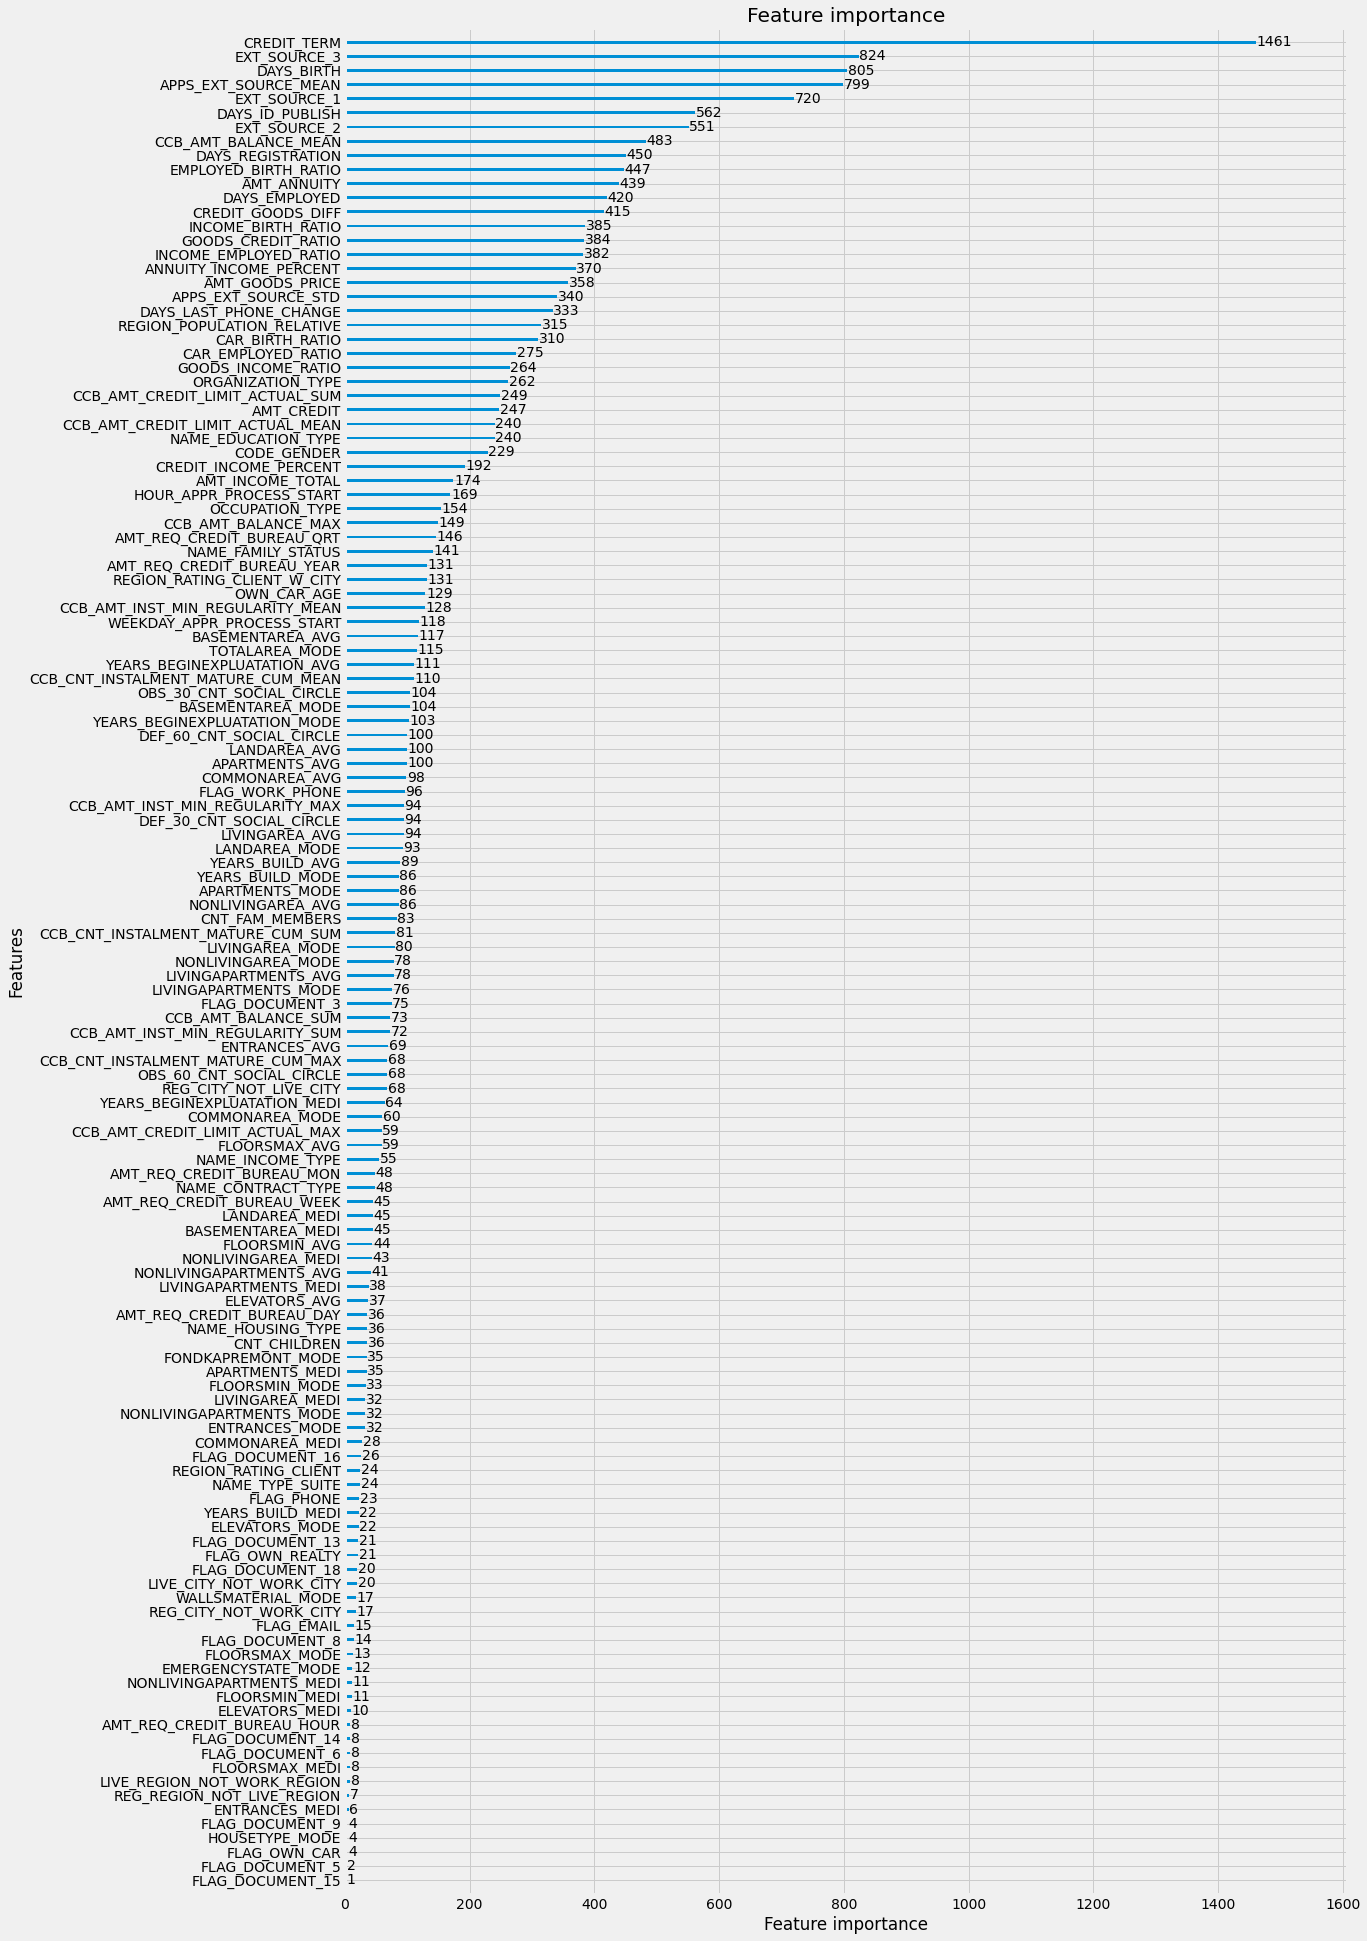

In [86]:
from lightgbm import plot_importance

plot_importance(clf, figsize=(16, 32))

In [87]:
# 학습된 Classifier를 이용하여 테스트 데이터 예측하고 결과를 Kaggle로 Submit 수행
preds = clf.predict_proba(apps_test.drop(['SK_ID_CURR', 'TARGET'], axis=1))[:, 1 ]

In [88]:
apps_test['TARGET'] = preds
apps_test[['SK_ID_CURR', 'TARGET']].to_csv('apps_baseline05.csv', index=False)